In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#Import .csv file
df=pd.read_csv('AB_NYC_2019_clean.csv')
df.head()

,Unnamed: 0,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [3]:
#Create dataframe with needed columns
rt_df=pd.DataFrame(df[['room_type','price','number_of_reviews']])
rt_df

,room_type,price,number_of_reviews
0,Private room,149,9
1,Entire home/apt,225,45
2,Private room,150,0
3,Entire home/apt,89,270
4,Entire home/apt,80,9
...,...,...,...
48890,Private room,70,0
48891,Private room,40,0
48892,Entire home/apt,115,0
48893,Shared room,55,0


In [4]:
#Use .groupby to divide info by room type
grouped= rt_df.groupby(["room_type"])
grouped

In [5]:
#Create bounds
lowerq = rt_df['price'].quantile([.25,.5,.75])[0.25]
upperq = rt_df['price'].quantile([.25,.5,.75])[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
rt_df = rt_df.loc[(rt_df['price'] > 0) & (rt_df['price'] < upper_bound) ]

The correlation between price and reviews for Entire Home/Apt in Airbnb is -0.06


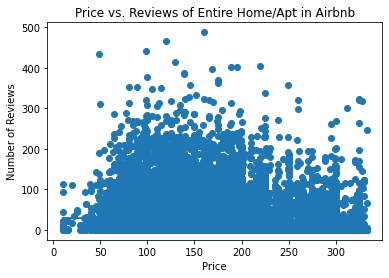

In [6]:
#Create a dataframe with the price of entire home/apt and reviews
entire_df=pd.DataFrame(rt_df.loc[rt_df["room_type"] == "Entire home/apt",:])
fig1, ax1 = plt.subplots()

#Identify x and y values
x_data= entire_df["price"]
y_data= entire_df ["number_of_reviews"]

# Calculate the correlation and regression model for price and number of reviews for Entire Home/Apt Airbnb
correlation = st.pearsonr(x_data, y_data)
print(f'The correlation between price and reviews for Entire Home/Apt in Airbnb is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept

#Create a scatter plot
marker_size=15
plt.scatter(x_data,y_data)
plt.plot(x_data, regress_values)
plt.title('Price vs. Reviews of Entire Home/Apt in Airbnb')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.savefig("entire_home_plot.png")
plt.show()

The correlation between price and reviews for Private Rooms in Airbnb is 0.0


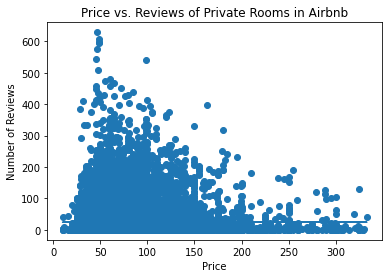

In [7]:
#Create a dataframe with the price of private rooms and reviews
private_df=pd.DataFrame(rt_df.loc[rt_df["room_type"] == "Private room",:])
fig1, ax1 = plt.subplots()

#Identify x and y values
x_data= private_df["price"]
y_data= private_df ["number_of_reviews"]

# Calculate the correlation and regression model for price and number of reviews for Private Rooms
correlation = st.pearsonr(x_data, y_data)
print(f'The correlation between price and reviews for Private Rooms in Airbnb is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept

#Create a scatter plot
marker_size=15
plt.scatter(x_data,y_data)
plt.plot(x_data, regress_values)
plt.title('Price vs. Reviews of Private Rooms in Airbnb')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.savefig("private_room_plot.png")
plt.show()

The correlation between price and reviews for Shared Rooms in Airbnb is -0.05


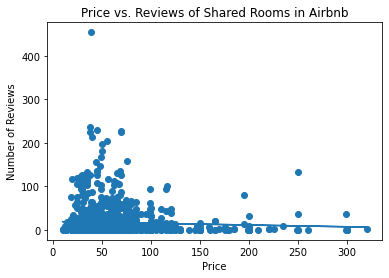

In [8]:
#Create a dataframe with the price of shared rooms and reviews
shared_df=pd.DataFrame(rt_df.loc[rt_df["room_type"] == "Shared room",:])
fig1, ax1 = plt.subplots()

#Identify x and y values
x_data= shared_df["price"]
y_data= shared_df ["number_of_reviews"]

# Calculate the correlation and regression model for price and number of reviews for Shared Rooms in Airbnb
correlation = st.pearsonr(x_data, y_data)
print(f'The correlation between price and reviews for Shared Rooms in Airbnb is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept

#Create a scatter plot
marker_size=15
plt.scatter(x_data,y_data)
plt.plot(x_data, regress_values)
plt.title('Price vs. Reviews of Shared Rooms in Airbnb')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.savefig("shared_room_plot.png")
plt.show()
